# Human genetics 

### Description 

The Human Phenotype Project collects genomic variation data on all its participants. The genomic data together with the Human Phenotype Project  deep-phenotypes allows to investigate the progression of disease, and to explore personalized treatments. We genotype millions of positions by low-pass sequencing combined with imputation using gencove platform technologies. Genotype imputation is a process of statistically inferring unobserved genotypes using known haplotypes in a population. The performance of Gencove genotype imputation is very high ( accuracy > 98% ) ([Wasik et al. 2021](https://link.springer.com/article/10.1186/s12864-021-07508-2?utm_campaign=2022.01%20Publications&utm_source=LP%20for%20Pharmacogenomics)). 

### Introduction

Genomic variation refers to DNA sequence differences between individuals. Some genetic variants can influence biological function (such as a mutation that causes a genetic disease), while others have no known effects. The genomic data together with the Human Phenotype Project rich variety of phenotypic data enables investigation of how genetics impact the progression of disease, and exploration of personalized prevention strategies and  treatments. 

The Human Phenotype Project uses low-pass sequencing combined with [imputation](https://en.wikipedia.org/wiki/Imputation_(genetics)) to obtain genomic variation, using [genocve](https://gencove.com) platform technologies. We do not target specific regions by sequencing, but rather sample the entire genome with low average depth of coverage, and impute the sequence data to the haplotype reference panel which includes a large set of known genetic variants. Briefly, the model approach is to identify haplotypes shared between a study sample and a reference panel based on the study sample observed genotypes. Next, the unobserved genotypes are extrapolated according to the large reference data as illustrated in Figure 1. Imputation is performed for single nucleotide polymorphisms (SNPs) and short insertion–deletion variants (indels), structural variation are currently not included. The overall accuracy of gencove imputed genotypes is 98.22% (Wasik et al. 2021). We also validated the accuracy of the imputation using two hundred Human Phenotype Project participants from several ancestries which had both low-pass sequencing done and Illumina genotyping array data. We obtained high concordance rates, greater than 96%.

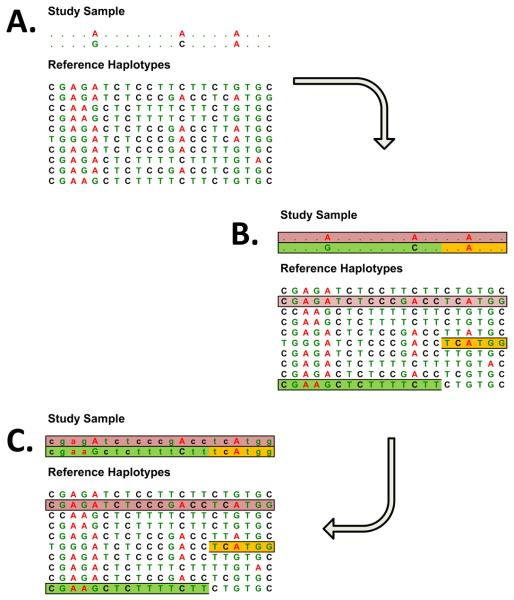

Figure 1: taken from [Li et al. 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2925172/).
Panel A illustrates the observed data which consists of genotypes at a modest number of genetic markers in each sample being studied and of detailed information on genotypes (or haplotypes) for a reference sample. Panel B illustrates the process of identifying regions of chromosomes shared between a study sample and individuals in the reference panel. In Panel C, observed genotypes and haplotype sharing information have been combined to fill in a series of unobserved genotypes in the study sample.*

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
#### Genotyping Procedure
DNA is collected from Human Phenotype Project participants using a buccal swab during their baseline visit. DNA is collected only once as germline DNA is considered constant. The buccal swabs are shipped to Gencove laboratories. The entire sequencing and genotyping workflow is performed by Gencove technologies. The Detailed information about the Gencove algorithms and quality control protocols are available in Wasik et al. 2021,  we briefly describe the key steps here.

Gencove’s workflow contains three steps: DNA extraction and library preparation, low-pass whole genome sequencing, and imputation analysis. Sequencing is performed at Neogen GeneSeek Laboratories using Illumina Novaseq at low-pass, targeting coverage levels of 0.5× and 1×. Whole-genome coverage is defined as the number of mapped DNA bases divided by the size of the genome (∼3 billion base pairs). We perform paired-end sequencing at length of 150-bp resulting in two FASTQ files (R1 and R2). Sequencing at paired-end mode significantly improves alignment to the genome. Next, the FASTQ files are aligned to the hs37-1kg reference genome, resulting in a BAM (Binary Alignment Map) file. In the sequence alignment procedure the DNA reads are mapped (in-pair) to the human genome reference sequence by similarity between the sequences. Lastly, loimpute-v0.1.0, Gencove’s imputation procedure, is used over the aligned reads. Imputation is done for the autosomal chromosomes (1-22) using The 1000 Genomes phase 3 haplotypes (1KGP3) as a reference panel, resulting in a VCF (Variant Call Format) file. The VCF contains the most likely genotype (GT) at 37,559,140 positions and their corresponding genotype probabilities (GP). Finally, Gencove employs quality control procedures to exclude samples with poor sequencing and genotyping results.

### Data availability 
<!-- for the example notebooks -->
The information is stored in a number of statistics parquet files:<br>
- `human_genetics.parquet`: sample metadata, including QC statistics, paths to PLINK variant files (raw and post-QC), and principal components (PCs).<br>
- `variants_qc.parquet`: variant QC statistics.<br>
- `relationship/relationship_ibs.txt`: IBS calculated by PLINK for pairs of participants.<br>
- `relationship/relationship_king.tsv`: King kinship coefficients for pairs of participants.<br>
- `pca/pca.parquet`: a PLINK file containing  principal components.<br>
- `pca/pca_loadings.tsv`: a PLINK file containing principal component loadings calculated.<br>

```{mermaid}
graph LR;
    D[DNA extraction] -->|sequencing| F(FASTQ) -->|alignment| B(BAM) -->|imputation| V(VCF)
    H[REFERENCE HAPLOTYPES] -->|imputation| V -->|"sample<br>aggregation"| R(BED<br>raw) -->|QC| Q(BED<br>post-qc)
    Q --> PCA(PCA)
    Q --> IBS(PLINK IBS<br>relationships)
    Q --> KING(KING<br>relationships)
```

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/014-human_genetics.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/14)

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('human_genetics')
pl

PhenoLoader for human_genetics with
189 fields
3 tables: ['human_genetics', 'pca', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,folder_id,feature_set,field_string,description_string,field_type,bulk_dictionary,bulk_file_extension,relative_location,data_coding,stability,units,sampling_rate,strata,sexed,array,completed,debut,transformation,list_of_tags,pandas_dtype
tabular_field_name,,,,,,,,,,,,,,,,,,,,
collection_date,14,human_genetics,Collection date,The date of downloading Gencove results from t...,Date,NaN,NaN,human_genetics/human_genetics.parquet,NaN,Accruing,Time,NaN,Auxiliary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,datetime64[ns]
version,14,human_genetics,Gencove version,Gencove API version 1 or 2,Categorical (single),NaN,NaN,human_genetics/human_genetics.parquet,NaN,Accruing,NaN,NaN,Auxiliary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,category
gencove_fastq_r1,14,fastq_bam,R1_FASTQ,"Per sample FASTQ file, a text file that contai...",Fastq file (individual),NaN,R1.fastq.gz,human_genetics/human_genetics.parquet,NaN,Accruing,Text,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,string
gencove_fastq_r2,14,fastq_bam,R2_FASTQ,"Per sample FASTQ file, a text file that contai...",Fastq file (individual),NaN,R2.fastq.gz,human_genetics/human_genetics.parquet,NaN,Accruing,Text,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,string
gencove_bam,14,fastq_bam,BAM,Per sample Binary Alignment Map (BAM) file for...,Bulk file (individual),NaN,bam,human_genetics/human_genetics.parquet,NaN,Accruing,Text,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,string
gencove_bai,14,fastq_bam,BAM indices,Per sample indices for BAM file,Bulk file (individual),NaN,bam.bai,human_genetics/human_genetics.parquet,NaN,Accruing,Text,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,string
gencove_vcf,14,fastq_bam,Imputation Variant Call Format (VCF),"Per sample VCF, a text file storing imputed ge...",Bulk file (individual),NaN,vcf.gz,human_genetics/human_genetics.parquet,NaN,Accruing,Text,NaN,Primary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,string
genecov_qc_bases,14,human_genetics,Bases sequenced,number of total bases sequenced. from genecov ...,Integer,NaN,NaN,human_genetics/human_genetics.parquet,NaN,Accruing,Count,NaN,Auxiliary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,int
genecov_qc_bases_dedup,14,human_genetics,Deduplicated bases,number of deduplicated bases. from genecov qc ...,Integer,NaN,NaN,human_genetics/human_genetics.parquet,NaN,Accruing,Count,NaN,Auxiliary,Both sexes,Single,NaN,NaN,NaN,Human Genetics,int
